# Sea surface temperature: realtime timeseries
----

J. Potemra<br>
February 2024

----
This notebook will access satellite-derived sea surface temperature (SST) and SST anomalies and plot a time-series of the most recent 30 days.

The data come from the NOAA Coral Reef Watch (CRW) version 3.1 operational global satellite coral bleaching heat stress monitoring products at 5-km resolution produced daily in near real-time, including sea surface temperature (SST), SST anomaly, HotSpot, Degree Heating Week (DHW), and Bleaching Alert Area (BAA). These data are based on CoralTemp Version 1.0, a daily global 5-km sea surface temperature dataset combined from: (1.) NOAA/NESDIS operational near-real-time daily global 5-km geostationary-polar-orbiting (geo-polar) blended night-only SST analysis, (2.) NOAA/NESDIS 2002-2016 reprocessed daily global 5-km geo-polar blended night-only SST analysis, and (3.) United Kingdom Met Office 1985-2002 daily global 5-km night-only SST reanalysis of Operational SST and Sea Ice Analysis (OSTIA). The SST anomaly is the difference of SST compared to daily SST climatology. The coral bleaching HotSpot is a special type of sea surface temperature (SST) anomaly and shows the difference of SST compared to a coral bleaching SST threshold climatology. DHW is the accumulation of Coral Bleaching HotSpots over a period of 12 consecutive weeks. The DHW value at any particular location at any particular time is the summation of the product of HotSpot values which are at least 1 deg C above the bleaching threshold SST and their durations in weeks over the most recent 12-week period. One DHW is equivalent to 1 week of SST at 1 deg C above the threshold or 0.5 week of SST at 2 deg C above the threshold, etc. The units for DHW are deg C-weeks, combining the intensity and duration of heat stress into one single number. Based on research at Coral Reef Watch, when the heat stress reaches 4 deg C-weeks, you can expect to see significant coral bleaching, especially in more sensitive species. When heat stress is 8 deg C-weeks or higher, you would likely see widespread bleaching and mortality from the heat stress. For access to the full time series, use PacIOO

The data are accessed from the PacIOOS OPeNDAP server at https://pae-paha.pacioos.hawaii.edu/thredds/dodsC/dhw_5km

## Import needed packages

In [1]:
# data I/O and processing
import xarray as xr
import pandas as pd
import numpy as np

# data plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Define lat/lon point for display

In [2]:
# select lat/lon location
xlon = 134.0
ylat = 7.0

## Get most recent time

In [3]:
url = 'https://pae-paha.pacioos.hawaii.edu/thredds/dodsC/dhw_5km'
ds = xr.open_dataset(url)

obs_lon = ds['longitude'].to_numpy()
i = np.argmin(np.abs(obs_lon-xlon))
obs_lat = ds['latitude'].to_numpy()
j = np.argmin(np.abs(obs_lat-ylat))

# get most recent 30 days
sst = ds['CRW_SST'][-30:,j,i]
ssta = ds['CRW_SSTANOMALY'][-30:,j,i]

## Make a plot
Here we define a couple functions to add fancy axes and maps/coastlines to our figures.  First we set some "global attributes" like the geographic extent of the maps, map projection, _etc._

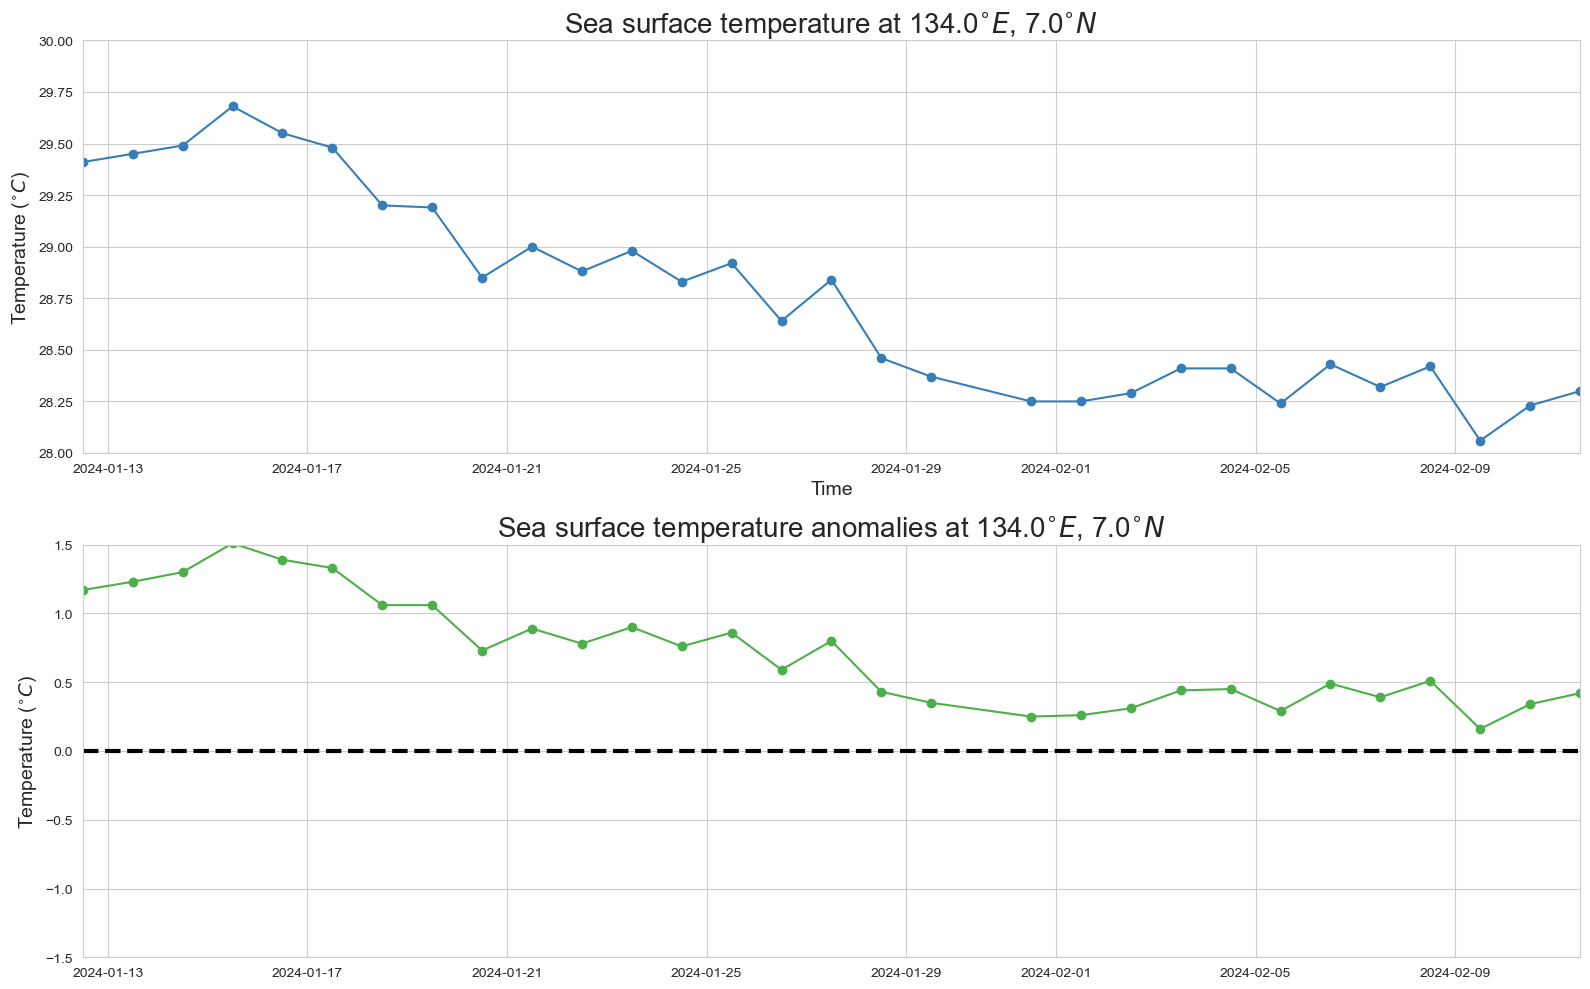

In [4]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a color palette
palette = sns.color_palette("Set1")

# Find range
trange = [ssta['time'][0].values,ssta['time'][-1].values]

# Plot the timeseries
# Create the figure and the axes
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(16,10))

# plot raw, daily and monthly mean values
ax[0].plot(sst['time'], sst, color=palette[1], linestyle='-', marker='o')
ax[0].set_xlabel('Time',fontsize=14)
ax[0].set_ylabel('Temperature ($^{\circ}C$)',fontsize=14)
ax[0].set_xlim(trange)
ax[0].set_ylim([28,30])
ax[0].set_title('Sea surface temperature at ' + str(xlon) + '$^{\circ}E$, ' + str(ylat) + '$^{\circ}N$',fontsize=20)

ax[1].plot(ssta['time'], ssta, color=palette[2], linestyle='-', marker='o')
ax[1].plot(trange,[0,0],color='black', linestyle='--', linewidth=3)
ax[1].set_ylabel('Temperature ($^{\circ}C$)',fontsize=14)
ax[1].set_xlim(trange)
ax[1].set_ylim([-1.5,1.5])
ax[1].set_title('Sea surface temperature anomalies at ' + str(xlon) + '$^{\circ}E$, ' + str(ylat) + '$^{\circ}N$',fontsize=20)

fig.tight_layout()
plt.savefig('./images/temp_current_ts.png')